In [1]:
import xarray as xr
import pandas as pd
import paraguayfloodspy.visualize as viz
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

The seasonal forecasts were downloaded from the IRI data library to speed computation

In [2]:
url = '(https://iridl.ldeo.columbia.edu/expert/90.0//percentile/parameter/SOURCES/.IRI/.FD/.Flexible_Forecast/.precipitation/exch/100.0/div/2/mul/1/sub/erfinv/clim_stddev/mul/2/sqrt/mul/clim_mean/add/X/-66.25/-48.75/RANGE/Y/-39.25/-16.75/RANGE/dup/fcst_mean/sub/fcst_stddev/div/2/sqrt/div/erf/-1/mul/1/add/2/div/(exceeding)//proba/parameter/(exceeding)/ne/%7B-1/mul/1/add%7Dif/S//fullname/(Month%20Forecast%20Issued)/def/pop/(long_name)/(Probability%20of%20)//proba/get_parameter/append/(%20)/append//percentile/get_parameter/s==/append/(th%20%25-ile)/append/def/L/2.5/VALUE/S/670.0/VALUE/gridtable.tsv'
print(url)

(https://iridl.ldeo.columbia.edu/expert/90.0//percentile/parameter/SOURCES/.IRI/.FD/.Flexible_Forecast/.precipitation/exch/100.0/div/2/mul/1/sub/erfinv/clim_stddev/mul/2/sqrt/mul/clim_mean/add/X/-66.25/-48.75/RANGE/Y/-39.25/-16.75/RANGE/dup/fcst_mean/sub/fcst_stddev/div/2/sqrt/div/erf/-1/mul/1/add/2/div/(exceeding)//proba/parameter/(exceeding)/ne/%7B-1/mul/1/add%7Dif/S//fullname/(Month%20Forecast%20Issued)/def/pop/(long_name)/(Probability%20of%20)//proba/get_parameter/append/(%20)/append//percentile/get_parameter/s==/append/(th%20%25-ile)/append/def/L/2.5/VALUE/S/670.0/VALUE/gridtable.tsv


In [3]:
savefigs=True

In [5]:
df = pd.read_csv("../data/given/SeasonalForecast.tsv", skiprows=2, 
                 delim_whitespace=True, names=['lon', 'lat', 'prob_exceed'],
                index_col=['lat', 'lon'])
df = df['prob_exceed'].to_xarray()
df

<xarray.DataArray 'prob_exceed' (lat: 11, lon: 8)>
array([[ 0.131585,  0.127272,  0.108975,       nan,       nan,       nan,
              nan,       nan],
       [ 0.125527,  0.115714,  0.124425,  0.126526,  0.116345,       nan,
              nan,       nan],
       [ 0.116346,  0.122361,  0.12407 ,  0.118156,  0.125047,  0.113252,
              nan,       nan],
       [ 0.112928,  0.113806,  0.111071,  0.118718,  0.112531,  0.137355,
              nan,       nan],
       [ 0.116443,  0.099168,  0.202632,  0.311926,  0.334004,  0.342154,
         0.214985,       nan],
       [ 0.115646,  0.105998,  0.295407,  0.435098,  0.472832,  0.340226,
         0.206801,  0.13434 ],
       [ 0.109065,  0.108941,  0.109121,  0.229893,  0.207065,  0.153069,
         0.128041,  0.143561],
       [ 0.111044,  0.110351,  0.106416,  0.108653,  0.116241,  0.132193,
         0.120862,  0.128792],
       [ 0.113711,  0.104995,  0.100909,  0.111175,  0.119987,  0.126143,
         0.126475,  0.140883],
    

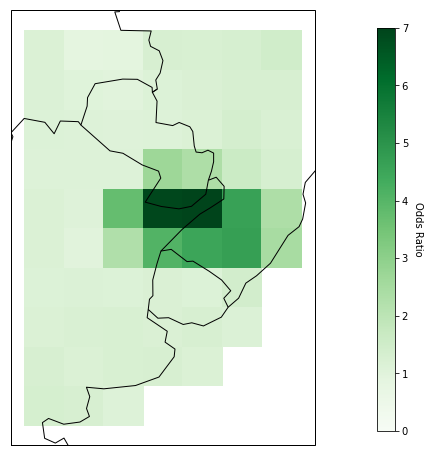

In [6]:
fig, ax = viz.SetupAxes(figsize=(7,8), ncol=1, nax=1,proj=ccrs.PlateCarree())
fig.subplots_adjust(right=0.925)
cax1 = fig.add_axes([0.95, 0.15, 0.035, 0.7])
X,Y = np.meshgrid(df.lon, df.lat)
sub = np.ma.masked_invalid((df/(1-df)) / (.1/(1-.1)))
C = ax.pcolormesh(X,Y, sub, transform=ccrs.PlateCarree(), 
                  cmap="Greens", vmin=0, vmax=7)
cb = plt.colorbar(C, cax=cax1)
cb.set_label("Odds Ratio", rotation=270)
cb.ax.get_yaxis().labelpad = 15
viz.FormatAxes(ax)
if savefigs:
    fig.savefig("../figs/SeasonalForecast.pdf", bbox_inches='tight')